In [44]:
import scipy.io
import numpy as np
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/Users/dongziming/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#load training data
train0= scipy.io.loadmat('training_data_0.mat')
train1=scipy.io.loadmat('training_data_1.mat')
#load testing data
test0=scipy.io.loadmat('testing_data_0.mat')
test1=scipy.io.loadmat('testing_data_1.mat')

In [4]:
def vectorize(NumberOfSample,data,number):
    new=data[number][:,:,0].flatten()
    for i in range(1,NumberOfSample):  
        new=np.vstack((new,data[number][:,:,i].flatten()))
    return new

In [5]:
train0_vec=vectorize(train0['nim0'].shape[2],train0,'nim0')
train1_vec=vectorize(train1['nim1'].shape[2],train1,'nim1')

In [27]:
train0_vec.shape

(5923, 784)

In [7]:
train1_vec.shape

(6742, 784)

In [14]:
train_all=np.vstack((train0_vec,train1_vec))

In [15]:
train_all.shape

(12665, 784)

In [31]:
label0=np.zeros((5923,1))
label1=np.ones((6742,1))
labels=np.vstack((label0,label1))

In [32]:
train=np.hstack((train_all,labels))

In [34]:
train.shape

(12665, 785)

In [36]:
train_X=train[:,0:784]
train_label=train[:,784]

In [39]:
train_label.shape

(12665,)

In [40]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(train_X)
print(standardized_data.shape)
print(standardized_data)

(12665, 784)
[[-0.55430052  0.27165237  1.68638311 ... -1.30274838 -0.45764161
  -1.1682951 ]
 [ 0.11803945 -1.29656761  1.84173716 ... -0.79633939 -0.3688669
   0.92871106]
 [ 0.27557604 -0.11163602 -1.23220356 ... -0.79707007  0.36224291
   0.63233088]
 ...
 [-1.03983084  1.52523571 -0.5213019  ... -0.42912557 -0.66248128
  -0.29377408]
 [-0.92755954  0.5193553   1.27833008 ...  0.08179955 -0.77539448
  -1.17733305]
 [ 2.81715026 -0.25352585  1.66826934 ... -1.04060561  2.41264723
   2.84901949]]


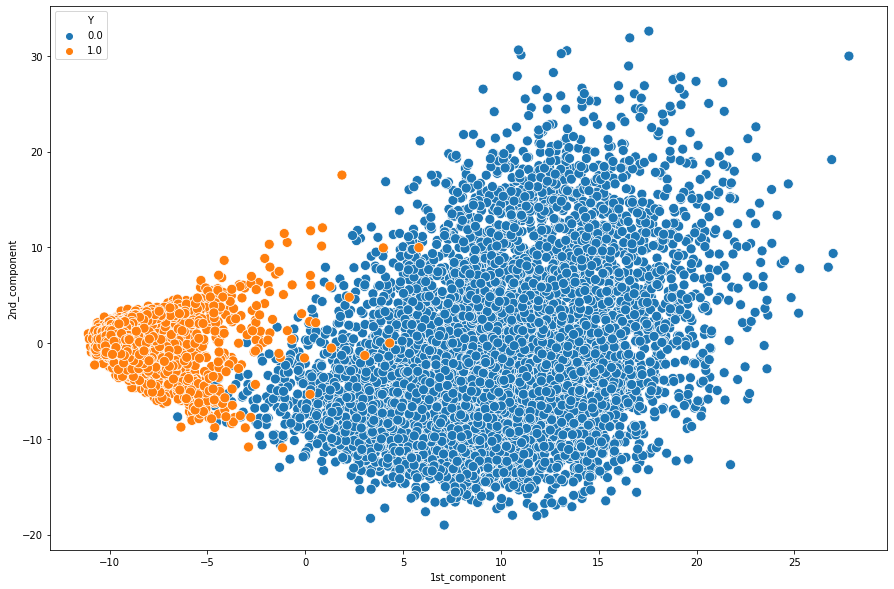

In [45]:
#Diemnsion reduction using PCA, 
#plot/visualize the training and testing samples in the 2-d space.
#Plot train samples firstly
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(standardized_data)
train_principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1st_component', '2nd_component'])
train_principalDf['Y'] = train_label
plt.figure(figsize=(15, 10))
sn.scatterplot(train_principalDf['1st_component'], train_principalDf['2nd_component'], hue=train_principalDf['Y'], s=100)

In [46]:
print(pca.explained_variance_ratio_)

[0.12686329 0.05076919]


In [61]:
values=pca.components_
values

array([[-6.71636172e-04, -5.47816983e-04, -6.55489832e-04, ...,
         3.45145160e-06,  9.68309866e-04,  6.87724198e-04],
       [-2.18256007e-03,  1.50132273e-03, -9.36206411e-04, ...,
         5.24721757e-04, -2.09675639e-03, -8.99464681e-04]])

In [66]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
var.pdf([0.1,0.1])

0.1575713249484893

In [4]:
import numpy as np
m=np.matrix([[1,1,1],
            [1,2,2],
            [1,2,0],
            [-1,0,0],
            [-1,1,0],
            [-1,0,1]])
pse=np.linalg.pinv(m)

In [5]:
pse

matrix([[ 1.36363636e-01,  4.54545455e-02,  4.54545455e-02,
         -2.27272727e-01, -3.18181818e-01, -2.27272727e-01],
        [-2.59740260e-02,  3.89610390e-02,  3.24675325e-01,
          9.09090909e-02,  2.98701299e-01, -5.19480519e-02],
        [ 1.42857143e-01,  2.85714286e-01, -2.85714286e-01,
          4.30504446e-17, -1.42857143e-01,  2.85714286e-01]])

In [20]:
mat1=np.matrix([[1,1,1,1,1,1],
              [1,1,1,1,1,1],
              [1,1,1,1,1,1],
               [1,1,1,1,1,1],
               [1,1,1,1,1,1],[1,1,1,1,1,1]])

In [21]:
res = np.dot(pse,mat1)

In [25]:
mat2=np.matrix([[1,1,1,1,1,2],
              [1,1,1,1,1,2],
              [1,1,1,1,1,2],
               [1,1,1,1,1,2],
               [1,1,1,1,1,2],[1,1,1,1,1,2]])

In [26]:
res2 = np.dot(res,mat2)

In [27]:
res2

matrix([[-3.27272727, -3.27272727, -3.27272727, -3.27272727, -3.27272727,
         -6.54545455],
        [ 4.05194805,  4.05194805,  4.05194805,  4.05194805,  4.05194805,
          8.1038961 ],
        [ 1.71428571,  1.71428571,  1.71428571,  1.71428571,  1.71428571,
          3.42857143]])

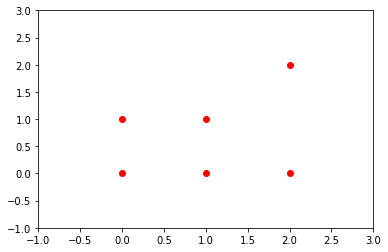

In [29]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 2, 0, 1, 0], [1, 2, 0, 0, 0, 1], 'ro')
plt.axis([-1, 3, -1, 3])
plt.show()

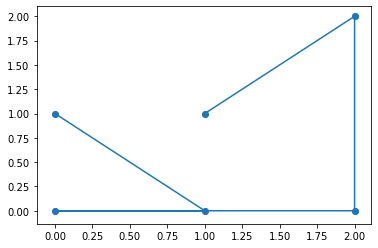

In [34]:

import  numpy as np 
import matplotlib.pyplot as plt 
  
x = np.array([1, 2, 2, 0, 1, 0]) 
  
# values of y 
y = np.array([1, 2, 0, 0, 0, 1]) 
  
# empty list, will hold color value 
# corresponding to x 
col =[] 

for i in range(0, len(x)): 
    if i<3: 
        col.append('blue')   
    else: 
        col.append('magenta')  
        
for i in range(len(x)): 
      
    # plotting the corresponding x with y  
    # and respective color 
    plt.scatter(x[i], y[i], c = col[i], s = 40, 
                linewidth = 0) 
plt.plot(x,y)
plt.show()

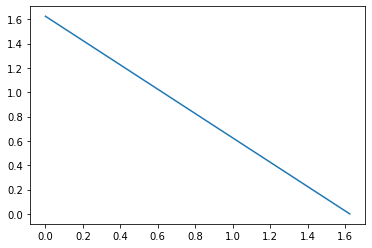

In [35]:
x=[0,1.625]
y=[1.625,0]
plt.plot(x,y)
plt.show()